In [36]:
import os
import seaborn as sns
from pathlib import Path
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [62]:
path = "/cluster/work/haaknes/tdt17/yolov8/data/from_idun"
mot_metrics = defaultdict(list)
for root, dirs, files in os.walk(path, topdown=False):
   for name in files:
      if name == "gt.txt":
        video = Path(root).parent.name
        print(video)
        print(root, name)
        mot_metrics[video] = np.loadtxt(Path(root) / name, delimiter=',') 
names = ["Frame no", "Track ID", "X-center", "Y-center", "Height", "Width", None, "Class", None]
stats = defaultdict(lambda: defaultdict((np.ndarray)))
for key, value in mot_metrics.items():
    for i, name in enumerate(names):       
        stats[key][name] = value[:, i]
    print(stats[key]["Frame no"])

df_list = []
for video, values in stats.items():
    df_video = pd.DataFrame(values)
    df_video['Video'] = video
    df_list.append(df_video)

# Concatenate DataFrames
df = pd.concat(df_list, ignore_index=True)
class_mapping = {1: 'ball', 2: 'player'}
df['Class'] = df['Class'].map(class_mapping)


3_test_1min_hamkam_from_start
/cluster/work/haaknes/tdt17/yolov8/data/from_idun/3_test_1min_hamkam_from_start/gt gt.txt
1_train-val_1min_aalesund_from_start
/cluster/work/haaknes/tdt17/yolov8/data/from_idun/1_train-val_1min_aalesund_from_start/gt gt.txt
2_train-val_1min_after_goal
/cluster/work/haaknes/tdt17/yolov8/data/from_idun/2_train-val_1min_after_goal/gt gt.txt
[1.000e+00 1.000e+00 1.000e+00 ... 1.802e+03 1.802e+03 1.802e+03]
[1.000e+00 1.000e+00 1.000e+00 ... 1.802e+03 1.802e+03 1.802e+03]
[1.000e+00 1.000e+00 1.000e+00 ... 1.802e+03 1.802e+03 1.802e+03]


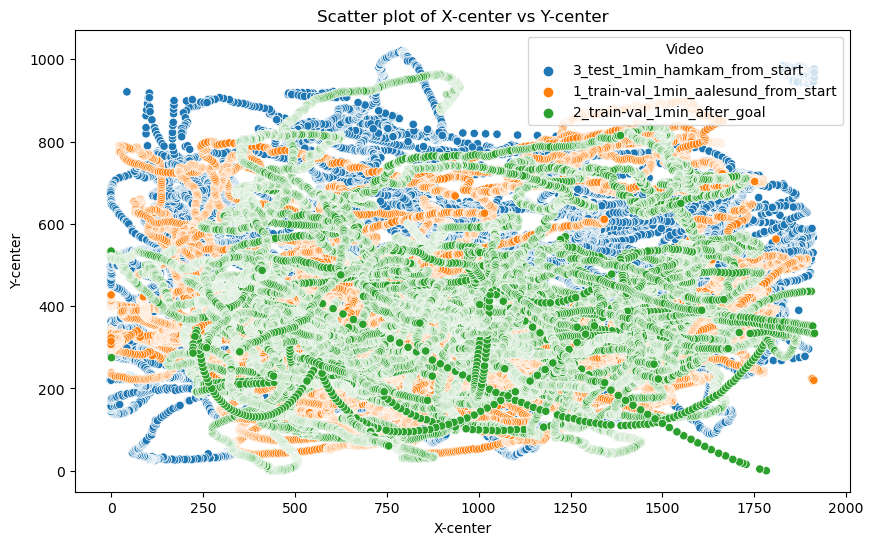

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X-center', y='Y-center', hue='Video', data=df)
plt.title('Scatter plot of X-center vs Y-center')
plt.show()

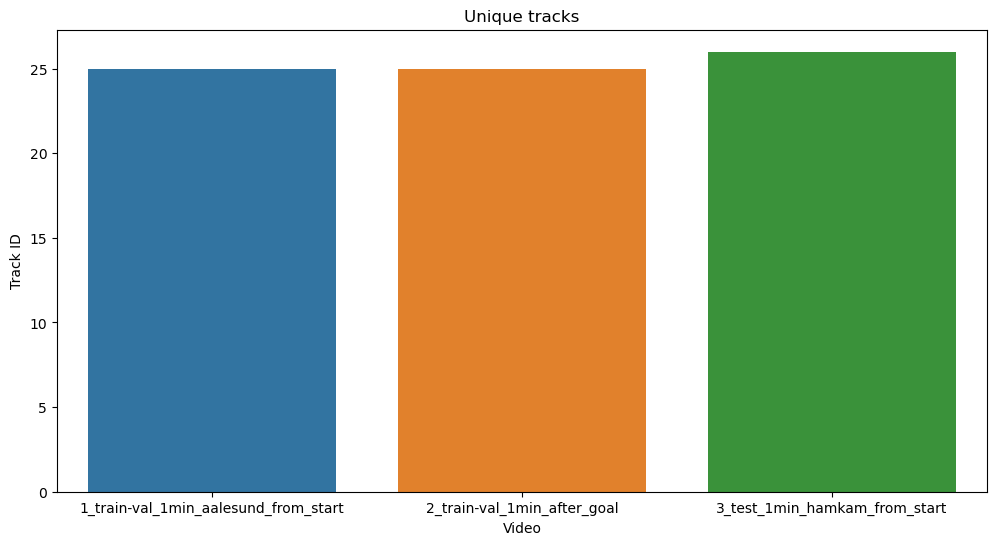

In [64]:
unique_tracks_per_video = df.groupby('Video')['Track ID'].nunique().reset_index()

# Plotting the number of unique tracks for each video
plt.figure(figsize=(12, 6))
sns.barplot(x='Video', y='Track ID', data=unique_tracks_per_video)
plt.title('Unique tracks')
plt.show()


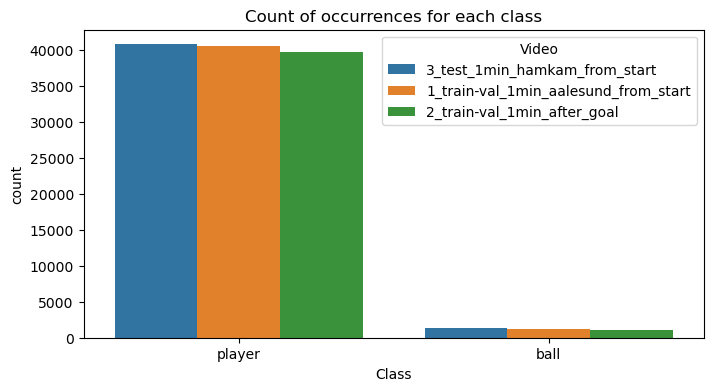

In [65]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Class', hue="Video", data=df)
plt.title('Count of occurrences for each class')
plt.show()

In [66]:
balls_per_frame = df[df['Class'] == 'ball'].groupby(['Video', 'Frame no']).size().reset_index(name='Number of Balls')
# print(balls_per_frame)

agg_balls_per_video = balls_per_frame.groupby('Video')['Number of Balls'].agg(['min', 'max']).reset_index()

print("Maximum and minimum number of balls per frame for each video:")
print(agg_balls_per_video)

Maximum and minimum number of balls per frame for each video:
                                  Video  min  max
0  1_train-val_1min_aalesund_from_start    1    1
1           2_train-val_1min_after_goal    1    1
2         3_test_1min_hamkam_from_start    1    1


In [67]:
player_per_frame = df[df['Class'] == 'player'].groupby(['Video', 'Frame no']).size().reset_index(name='Number of Players')
# print(balls_per_frame)

agg_players_per_video = player_per_frame.groupby('Video')['Number of Players'].agg(['min', 'max']).reset_index()

print("Maximum and minimum number of players per frame for each video:")
print(agg_players_per_video)

Maximum and minimum number of players per frame for each video:
                                  Video  min  max
0  1_train-val_1min_aalesund_from_start   21   23
1           2_train-val_1min_after_goal   21   23
2         3_test_1min_hamkam_from_start   20   24
